In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import glob
import re
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

Path variables

In [2]:
path = 'DLRV_Dataset/'
action = ['click', 'move', 'scroll']

In [3]:
click_files = listdir(path+action[0])
move_files = listdir(path+action[1])
scroll_files = listdir(path+action[2])

### Read all csv files

3 actions - click, move, scroll

In [4]:
def read_csv(filenames, action):
    df = []
    for file in filenames:
        df.append(pd.read_csv(path+'/'+action+'/'+file, sep=';'))
    
    df_all = pd.concat(df)
    return df_all

df_click = read_csv(click_files, 'click')
df_move = read_csv(move_files, 'move')
df_scroll = read_csv(scroll_files, 'scroll')

In [5]:
df_scroll.head()

,Unnamed: 0,time,token,event,position
0,0,2022-01-13 12:43:31.444000+00:00,D+BwNpkU94N2MPcl,scroll,0.0
1,1,2022-01-13 12:44:38.093000+00:00,D+BwNpkU94N2MPcl,scroll,1.0
2,2,2022-01-13 12:44:38.109000+00:00,D+BwNpkU94N2MPcl,scroll,6.0
3,3,2022-01-13 12:44:38.126000+00:00,D+BwNpkU94N2MPcl,scroll,14.0
4,4,2022-01-13 12:44:38.143000+00:00,D+BwNpkU94N2MPcl,scroll,27.0


In [19]:
df_move.head()

,Unnamed: 0,time,token,event,global_position
0,0,2022-01-13 12:44:11.672000+00:00,LbORFcceht0nuUhv,move,"[961, 597]"
1,1,2022-01-13 12:44:11.683000+00:00,LbORFcceht0nuUhv,move,"[960, 597]"
2,2,2022-01-13 12:44:11.694000+00:00,LbORFcceht0nuUhv,move,"[960, 595]"
3,3,2022-01-13 12:44:11.710000+00:00,LbORFcceht0nuUhv,move,"[962, 584]"
4,4,2022-01-13 12:44:11.727000+00:00,LbORFcceht0nuUhv,move,"[964, 569]"


In [20]:
df_click.head()

,Unnamed: 0,time,token,event,nodeName,nodeType,global_position,local_position,local_dimensions
0,0,2022-01-13 08:54:42.900000+00:00,qCGnlIkLoHHQFGEi,click,BUTTON,NaN,"[1139, 359]","[57, 29]","[36, 107]"
1,1,2022-01-13 08:55:06.274000+00:00,qCGnlIkLoHHQFGEi,click,LABEL,NaN,"[202, 461]","[76, 9]","[24, 239]"
2,2,2022-01-13 08:55:06.281000+00:00,qCGnlIkLoHHQFGEi,click,INPUT,radio,"[202, 461]","[99, 4]","[14, 14]"
3,3,2022-01-13 08:55:35.910000+00:00,qCGnlIkLoHHQFGEi,click,INPUT,radio,"[110, 102]","[7, 9]","[14, 14]"
4,4,2022-01-13 08:55:38.045000+00:00,qCGnlIkLoHHQFGEi,click,LABEL,NaN,"[284, 131]","[158, 17]","[24, 186]"


### Columns for each dataset

In [8]:
print('Columns available for click data:', list(df_click.columns))
print('Columns available for move data:', list(df_move.columns))
print('Columns available for scroll data:', list(df_scroll.columns))

Columns available for click data: ['Unnamed: 0', 'time', 'token', 'event', 'nodeName', 'nodeType', 'global_position', 'local_position', 'local_dimensions']
Columns available for move data: ['Unnamed: 0', 'time', 'token', 'event', 'global_position']
Columns available for scroll data: ['Unnamed: 0', 'time', 'token', 'event', 'position']


In [9]:
print('Click Data')
print(df_click.info())
print('**'*30)
print('Move Data')
print(df_move.info())
print('**'*30)
print('Scroll Data')
print(df_scroll.info())

Click Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33732 entries, 0 to 305
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        33732 non-null  int64 
 1   time              33732 non-null  object
 2   token             33732 non-null  object
 3   event             33732 non-null  object
 4   nodeName          32077 non-null  object
 5   nodeType          17565 non-null  object
 6   global_position   33732 non-null  object
 7   local_position    33732 non-null  object
 8   local_dimensions  33732 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.6+ MB
None
************************************************************
Move Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5313723 entries, 0 to 0
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       int64 
 1   time             object
 2   token            object


In [10]:
print('Unique users available for click data:',
      len(df_click['token'].unique()))
print('Unique users available for move data:',
      len(df_move['token'].unique()))
print('Unique users available for scroll data:',
      len(df_scroll['token'].unique()))

Unique users available for click data: 153
Unique users available for move data: 156
Unique users available for scroll data: 157


In [11]:
df_click['event'].unique(), df_move['event'].unique(), df_scroll['event'].unique(),

(array(['click'], dtype=object),
 array(['move'], dtype=object),
 array(['scroll'], dtype=object))

# Data cleaning
### 1. Change time format to datetime 

In [15]:
# convert 'time' column from object to datetime64
df_click['time'] = pd.to_datetime(df_click['time'])
df_move['time'] = pd.to_datetime(df_move['time'])
df_scroll['time'] = pd.to_datetime(df_scroll['time'])
df_click.info()
# https://docs.python.org/3/library/datetime.html#datetime-objects
# ---------------------------
# TO DO: 
# * check format for date-time (fromisoformat?)
# * might be useful: https://docs.python.org/3/library/datetime.html#datetime-objects (date = parser.parse(value))
# ---------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33732 entries, 0 to 305
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        33732 non-null  int64              
 1   time              33732 non-null  datetime64[ns, UTC]
 2   token             33732 non-null  object             
 3   event             33732 non-null  object             
 4   nodeName          32077 non-null  object             
 5   nodeType          17565 non-null  object             
 6   global_position   33732 non-null  object             
 7   local_position    33732 non-null  object             
 8   local_dimensions  33732 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 2.6+ MB


### 2. Change position objects to ints

In [27]:
def convert_to_int(df, action, column_name):
    global_position = []
    for value in df[column_name].values:
        t = (re.split('[]\[,]',value))
        global_position.append([int(t[1]), int(t[2])])
    
    global_position = np.array(global_position)
    return global_position

global_position_click = convert_to_int(df_click, 'click', 'global_position')
global_position_move = convert_to_int(df_move, 'move', 'global_position')

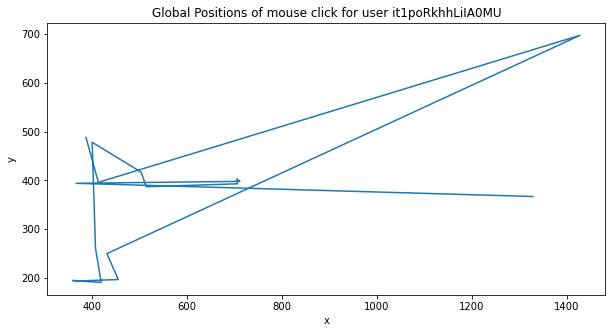

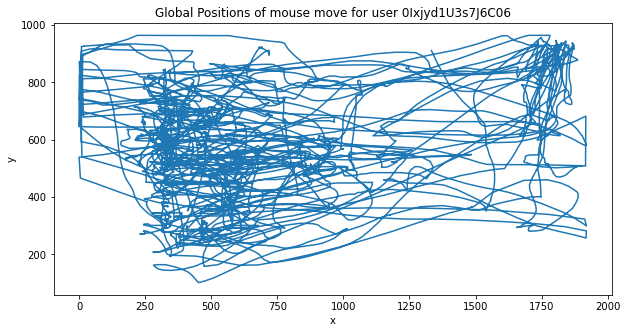

In [22]:
def plot_position(df, global_position, action):
    plt.figure(figsize=(10,5))
    plt.plot(global_position[:, 0], global_position[:, 1])
    plt.title('Global Positions of mouse '+action+' for user '+df['token'].unique()[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_position(df_click, global_position_click, 'click')
plot_position(df_move, global_position_move, 'move')

### 3. Remove unneeded columns

In [36]:
time_click = df_click['time']
time_move = df_move['time']
time_scroll = df_scroll['time']